<a href="https://colab.research.google.com/github/Nishanttalaviya/AI-ML/blob/main/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


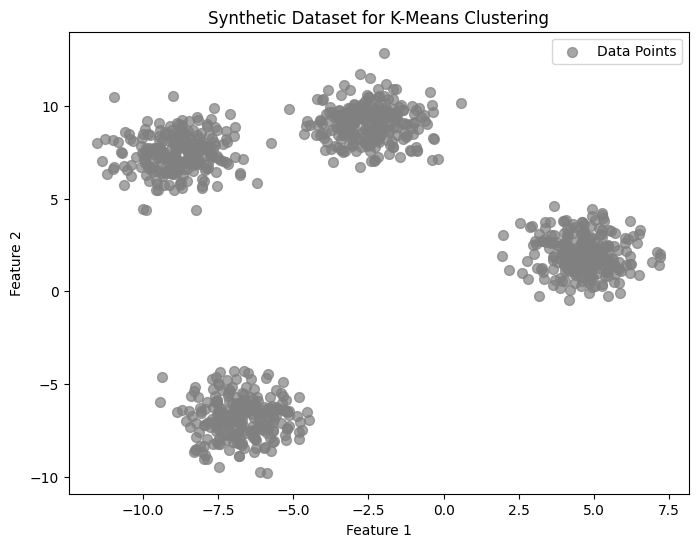

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()




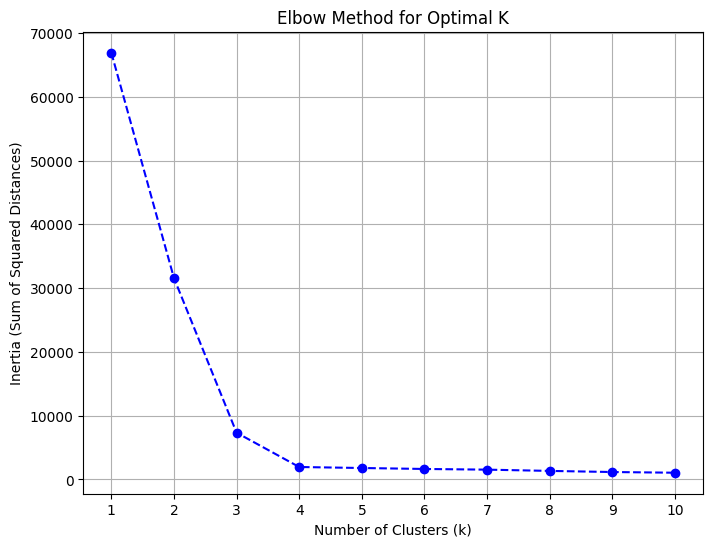

In [ ]:
# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()


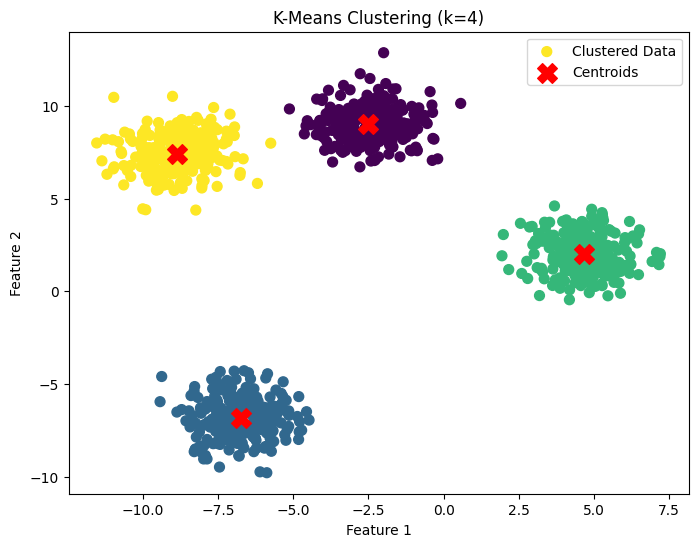

In [ ]:

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


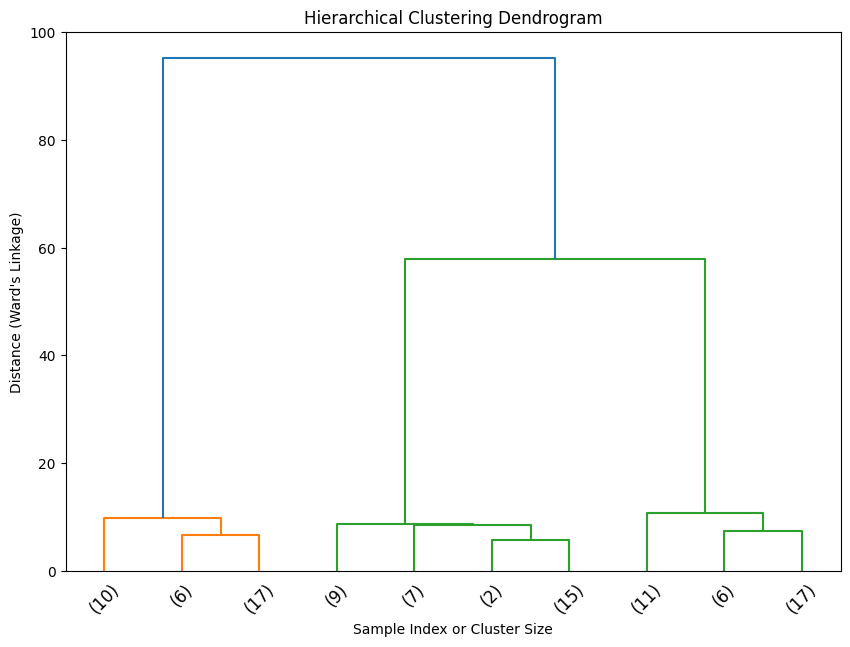

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()
# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 10
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




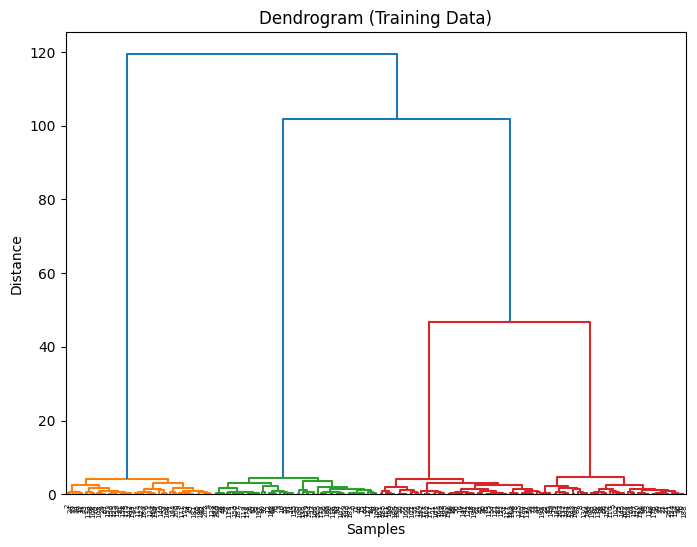

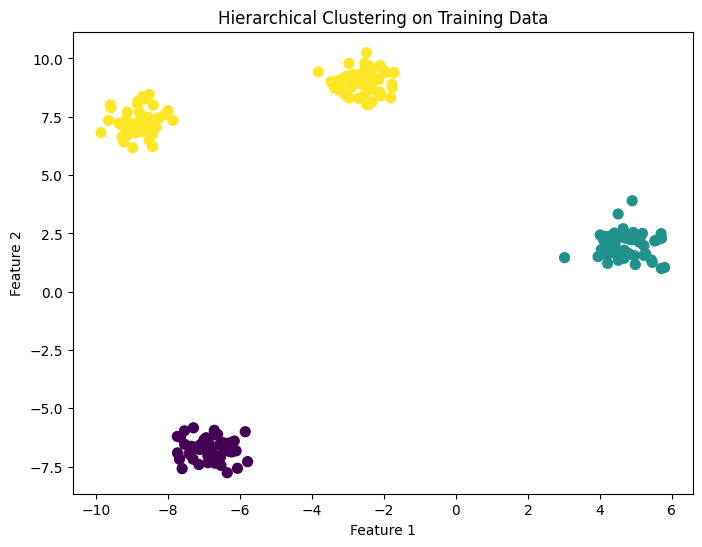

Silhouette Score for Training Data: 0.81


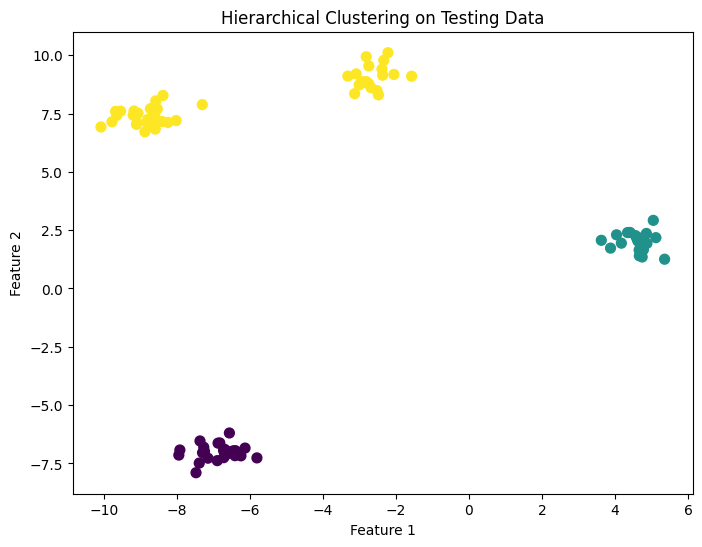

Silhouette Score for Testing Data: 0.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
dt=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
dt


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
